Если что, это Python 2.
Если у Вас что-то не запускается, не ставьте нули, пожалуйста, а напишите kvn505@ya.ru

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

Возьмем логнормальное распределение https://ru.wikipedia.org/wiki/Логнормальное_распределение
$$f_{X}(x)={\frac  {1}{x\sigma {\sqrt  {2\pi }}}}e^{{-(\ln x-\mu )^{2}/2\sigma ^{2}}}$$

Зададим параметры $\mu$ и $\sigma > 0$ и сгенерируем выборку в 1000 наблюдений.

In [17]:
mu = 0.0
sigma = 0.5

# зададим логнормально распределенную случайную величину
lognorm_rv = sts.lognorm(s = sigma, scale = math.exp(mu))

# сгенерируем 1000 значений
sample = lognorm_rv.rvs(size = 1000)

Построим гистограмму выборки и нарисуем поверх неё теоретическую плотность распределения нашей случайной величины. YНас в задании просят, чтобы величины были в одном масштабе, выставить у гистограммы значение параметра normed=True. Однако теперь этот параметр вместо normed называется density, иначе питон выдает warning

Text(0.5,0,'$x$')

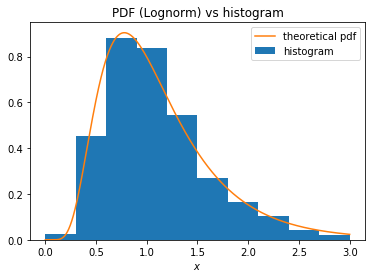

In [18]:
plt.hist(sample, range = (0,3), density = True, label='histogram')
x = np.linspace(0,3,1000)
pdf = lognorm_rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf')
plt.legend()
plt.title("PDF (Lognorm) vs histogram")
plt.xlabel('$x$')

In [41]:
samples5 = np.array([lognorm_rv.rvs(size = 5) for i in range(1000)])
samples10 = np.array([lognorm_rv.rvs(size = 10) for i in range(1000)])
samples50 = np.array([lognorm_rv.rvs(size = 50) for i in range(1000)])

In [50]:
from statistics import mean
mean5 = np.array([mean(samples5[i]) for i in range(1000)])
mean10 = np.array([mean(samples10[i]) for i in range(1000)])
mean50 = np.array([mean(samples50[i]) for i in range(1000)])
theor_mean = math.exp(mu + (sigma**2.)/2.)
theor_disp5 = ((math.exp(sigma**2.) - 1.) * math.exp(2.*mu + sigma**2.))/5.
theor_disp10 = ((math.exp(sigma**2.) - 1.) * math.exp(2.*mu + sigma**2.))/10.
theor_disp50 = ((math.exp(sigma**2.) - 1.) * math.exp(2.*mu + sigma**2.))/50.

$E[X] = e^{\mu +\sigma ^{2}/2}$, $D[X] = (e^{\sigma^2}-1) e^{2\mu +\sigma^2}$

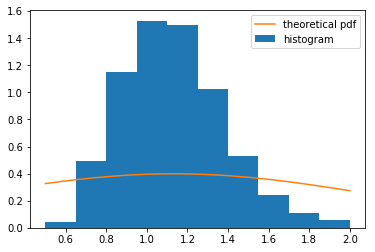

In [51]:
plt.hist(mean5, range = (0.5,2.0), density = True, label='histogram')
x = np.linspace(0.5,2.0,1000)
norm_rv = sts.norm(theor_mean, theor_disp5**(1/2))
pdf_norm = norm_rv.pdf(x)
plt.plot(x, pdf_norm, label='theoretical pdf')
plt.legend()

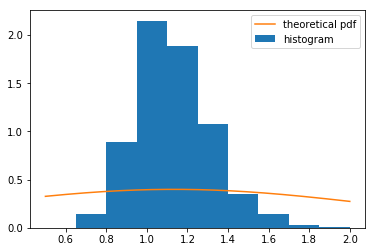

In [52]:
plt.hist(mean10, range = (0.5,2.0), density = True, label='histogram')
x = np.linspace(0.5,2.0,1000)
norm_rv = sts.norm(theor_mean, theor_disp10**(1/2))
pdf_norm = norm_rv.pdf(x)
plt.plot(x, pdf_norm, label='theoretical pdf')
plt.legend()

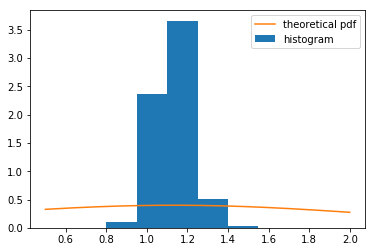

In [53]:
plt.hist(mean50, range = (0.5,2.0), density = True, label='histogram')
x = np.linspace(0.5,2.0,1000)
norm_rv = sts.norm(theor_mean, theor_disp50**(1/2))
pdf_norm = norm_rv.pdf(x)
plt.plot(x, pdf_norm, label='theoretical pdf')
plt.legend()